# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
data.loc[data['Gender'] == 'Male']

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


In [4]:
data.loc[data['Gender'] == 'Female']

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

In [6]:
print(male_df['Height'].mean())
print(male_df['Height'].std())
print(male_df['Weight'].mean())
print(male_df['Weight'].std())

print(female_df['Height'].mean())
print(female_df['Height'].std())
print(female_df['Weight'].mean())
print(female_df['Weight'].std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

69.02634590621737
2.8633622286606517
187.0206206581929
19.781154516763813
63.708773603424916
2.696284015765056
135.8600930074687
19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

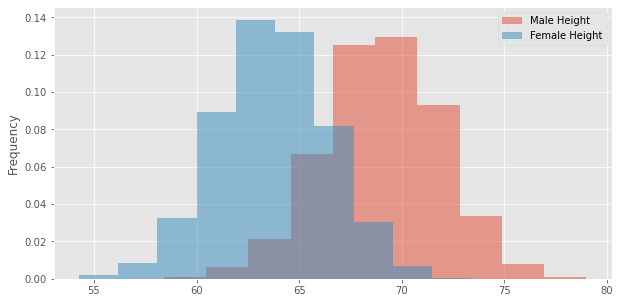

In [7]:
# Your code here
plt.figure(figsize = (10,5))
male_df['Height'].plot.hist(bins = 10, density = True, label = 'Male Height', alpha = 0.5)
female_df['Height'].plot.hist(bins = 10, density = True, label = 'Female Height', alpha = 0.5)
plt.legend()

# Record your observations - are these inline with your personal observations?
* Male is taller than female
* Most male and female are 65 - 68 tall
* Both male and female heights are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [16]:
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)

In [17]:
np.histogram(s)

(array([ 1,  1,  4,  8, 27, 22, 16, 12,  6,  3]),
 array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
        -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
         0.24307712]))

In [18]:
np.histogram(s, density = True)

#array 1 = y-axis
#array 2 = x-axis, and take the middle value between each of two x values

(array([0.18901951, 0.18901951, 0.75607804, 1.51215608, 5.10352679,
        4.15842923, 3.02431217, 2.26823413, 1.13411706, 0.56705853]),
 array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
        -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
         0.24307712]))

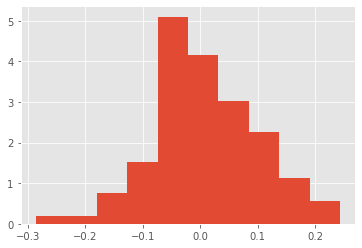

In [23]:
plt.hist(s, density = True);

In [27]:
my_hist = np.histogram(s, density = True)

In [28]:
type(my_hist)

tuple

In [29]:
my_hist[0] #y-axis

array([0.18901951, 0.18901951, 0.75607804, 1.51215608, 5.10352679,
       4.15842923, 3.02431217, 2.26823413, 1.13411706, 0.56705853])

In [30]:
my_hist[1] #x-axis, this is where we iterate

array([-0.2859688 , -0.23306421, -0.18015961, -0.12725502, -0.07435043,
       -0.02144584,  0.03145875,  0.08436334,  0.13726794,  0.19017253,
        0.24307712])

In [31]:
for counter, x in enumerate(my_hist[1]): #want to take 2 x-values and add them then divide by 2 to get middle point
                                        #enumerate adds a counter to whatever we are iterating through
        print(x, counter)
    

-0.2859687966622556 0
-0.23306420512595225 1
-0.18015961358964888 2
-0.12725502205334555 3
-0.07435043051704218 4
-0.02144583898073882 5
0.03145875255556452 6
0.08436334409186791 7
0.13726793562817124 8
0.19017252716447458 9
0.243077118700778 10


In [32]:
for counter, x in enumerate(my_hist[1]): #want to take 2 x-values and add them then divide by 2 to get middle point
                                        #enumerate adds a counter to whatever we are iterating through
        print(x, my_hist[1][counter])

-0.2859687966622556 -0.2859687966622556
-0.23306420512595225 -0.23306420512595225
-0.18015961358964888 -0.18015961358964888
-0.12725502205334555 -0.12725502205334555
-0.07435043051704218 -0.07435043051704218
-0.02144583898073882 -0.02144583898073882
0.03145875255556452 0.03145875255556452
0.08436334409186791 0.08436334409186791
0.13726793562817124 0.13726793562817124
0.19017252716447458 0.19017252716447458
0.243077118700778 0.243077118700778


In [33]:
for counter, x in enumerate(my_hist[1]): #want to take 2 x-values and add them then divide by 2 to get middle point
                                        #enumerate adds a counter to whatever we are iterating through
        print(x, my_hist[1][counter + 1]) #to get the next value

-0.2859687966622556 -0.23306420512595225
-0.23306420512595225 -0.18015961358964888
-0.18015961358964888 -0.12725502205334555
-0.12725502205334555 -0.07435043051704218
-0.07435043051704218 -0.02144583898073882
-0.02144583898073882 0.03145875255556452
0.03145875255556452 0.08436334409186791
0.08436334409186791 0.13726793562817124
0.13726793562817124 0.19017252716447458
0.19017252716447458 0.243077118700778


IndexError: index 11 is out of bounds for axis 0 with size 11

In [36]:
for counter, x in enumerate(my_hist[1]): #want to take 2 x-values and add them then divide by 2 to get middle point
                                        #enumerate adds a counter to whatever we are iterating through
        if counter + 1 < len(my_hist[1]):
            print(x + my_hist[1][counter + 1] / 2)

-0.40250089922523175
-0.3231440119207767
-0.24378712461632165
-0.16443023731186662
-0.08507335000741159
-0.0057164627029565596
0.07364042460149847
0.15299731190595353
0.23235419921040854
0.31171108651486357


In [38]:
density_x = []
for counter, x in enumerate(my_hist[1]): #want to take 2 x-values and add them then divide by 2 to get middle point
                                        #enumerate adds a counter to whatever we are iterating through
        if counter + 1 < len(my_hist[1]):
            density_x.append((x + my_hist[1][counter + 1] / 2))

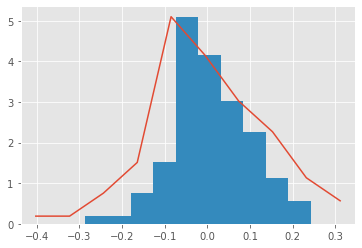

In [40]:
plt.plot(density_x, my_hist[0])
plt.hist(s, density = True);

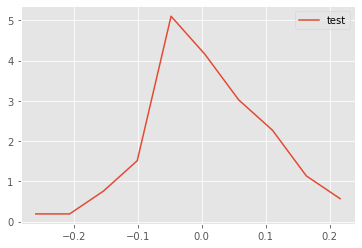

In [54]:
def density(my_array):
    
    my_hist = np.histogram(my_array, density = True)
    density_x = []
    for counter, x in enumerate(my_hist[1]):
        if counter + 1 < len(my_hist[1]):
            density_x.append((x + my_hist[1][counter + 1]) / 2)

    return density_x, my_hist[0]

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

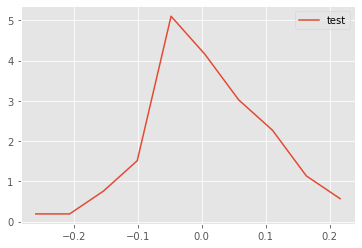

In [50]:
#alternative solution

def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    #initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    #interpolate through histogram bins
    #identify middle point between two neighboring bins
    for k in range(n.size):
        pdfx[k] = 0.5 * (bins[k] + bins[k + 1])
        pdfy[k] = n[k]
        
    #plot the calculated curve
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

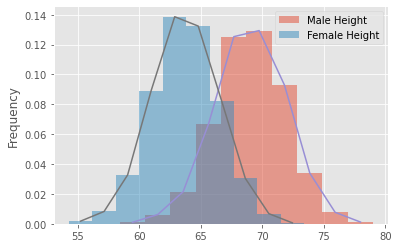

In [55]:
# Your code here 
plt.hist(male_df['Height'], bins = 10, density = True, label = 'Male Height', alpha = 0.5)
plt.hist(female_df['Height'], bins = 10, density = True, label = 'Female Height', alpha = 0.5)

x_men, y_men = density(male_df['Height'])
plt.plot(x_men, y_men)

x_women, y_women = density(female_df['Height'])
plt.plot(x_women, y_women)

plt.ylabel('Frequency')
plt.legend();

## Repeat the above exercise for male and female weights

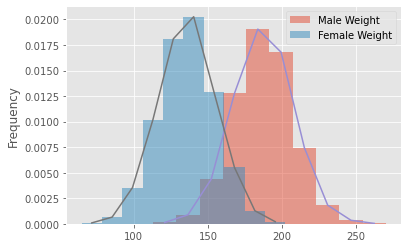

In [56]:
# Your code here 
plt.hist(male_df['Weight'], bins = 10, density = True, label = 'Male Weight', alpha = 0.5)
plt.hist(female_df['Weight'], bins = 10, density = True, label = 'Female Weight', alpha = 0.5)

x_men, y_men = density(male_df['Weight'])
plt.plot(x_men, y_men)

x_women, y_women = density(female_df['Weight'])
plt.plot(x_women, y_women)

plt.ylabel('Frequency')
plt.legend();

## Write your observations in the cell below

# Record your observations - are these inline with your personal observations?
* Male weights more than female
* Both male and female overlap at 150 - 170
* Both male and female weight are normally distributed


# What is the takeaway when comparing male and female heights and weights?
There are less overlapping between male and female weight so this is a better method to tell male and female apart

## Repeat the above experiments in seaborn and compare with your results

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

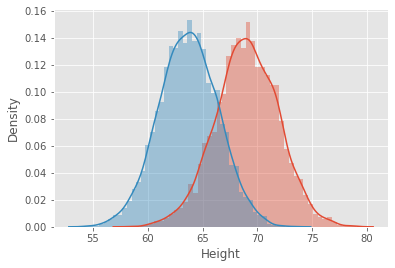

In [59]:
import seaborn as sns

# Code for heights here
sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

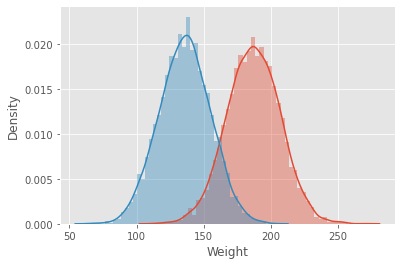

In [60]:
# Code for weights here
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])

In [15]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.